In [1]:
import gym 
import numpy as np
from custom_envs.gridworlds import WindyGridworldEnv, SimpleGridworldEnv

from function_approximators.function_approximators import NeuralNetwork, LinearModel, DecisionTree, RandomForest, ExtraTrees, GradientBoostingTrees, SupportVectorRegressor, KNeighboursRegressor

from utils.train_utils import train
from utils.plot_utils import plot_returns

from agents.av_agents import DQNAgent, LinearAgent, NonParametricAgent


In [2]:
function_approximators = [NeuralNetwork, LinearModel, DecisionTree, RandomForest, ExtraTrees, GradientBoostingTrees, SupportVectorRegressor, KNeighboursRegressor]
agents = [DQNAgent, LinearAgent, *[NonParametricAgent]*6]

RENDER = False
env = gym.make("CartPole-v1")
# env = gym.make("Acrobot-v1")
# env = gym.make("MountainCar-v0")
# env = WindyGridworldEnv()
# env = gym.make("LunarLander-v2")
# env = SimpleGridworldEnv()

In [3]:
# DQN Config
CONFIG_DQN = {
    "episode_length": 200,
    "max_timesteps": 20000,
    "max_time": 30 * 60,
    "eval_freq": 1000, 
    "eval_episodes": 10,
    "learning_rate": 0.00075,
    "hidden_size": (32,32),
    "target_update_freq": 200,
    "batch_size": 32,
    "gamma": 0.99,
    "buffer_capacity": int(1e7),
    "plot_loss": False,
    "epsilon": 1,
    "max_deduct": 0.97,
    "decay": 0.2,
    "lr_step_size": 1000,
    "lr_gamma": 0.95,
    "max_steps": 200,
    "non_param": False,
}

# Linear Config
CONFIG_LINEAR = {
    "episode_length": 200,
    "max_timesteps": 20000,
    "max_time": 30 * 60,
    "eval_freq": 1000, 
    "eval_episodes": 10,
    "learning_rate": 0.02,
    "target_update_freq": 50,
    "batch_size": 32,
    "gamma": 0.99,
    "buffer_capacity": int(1e7),
    "plot_loss": False,
    "epsilon": 1,
    "max_steps": 200,
    "poly_degree": 2,
    "max_deduct": 0.97,
    "decay": 0.5,
    "lr_step_size": 1000,
    "lr_gamma": 0.99,
    "non_param": False,
}

# Decision Tree Config
CONFIG_DT = {
    "episode_length": 200,
    "max_timesteps": 20000,
    "max_time": 30 * 60,
    "eval_freq": 1000, 
    "eval_episodes": 10,
    "model_save_freq": 1000,
    "model_save_capacity": 20,
    "update_freq": 1,
    "batch_size": 512,
    "gamma": 0.99,
    "buffer_capacity": int(1e6),
    "epsilon": 1,
    "max_deduct": 0.95,
    "decay": 0.4,
    "max_steps": 200,
    "non_param": True,
    "model_params": {"criterion":"mse","max_depth": 10, "min_samples_split": 20, "min_samples_leaf": 5},
}

# Random Forest Config
CONFIG_RF = {
    "episode_length": 200,
    "max_timesteps": 20000,
    "max_time": 30 * 60,
    "eval_freq": 1000, 
    "eval_episodes": 10,
    "model_save_freq": 1000,
    "model_save_capacity": 20,
    "update_freq": 1,
    "batch_size": 512,
    "gamma": 0.99,
    "buffer_capacity": int(1e5),
    "epsilon": 1,
    "max_deduct": 0.95,
    "decay": 0.3,
    "max_steps": 200,
    "non_param": True,
    "model_params": {"n_estimators": 10,"max_depth": 10, "min_samples_split": 10, "min_samples_leaf": 10},
}

# Extra Trees Config
CONFIG_ET = {
    "episode_length": 200,
    "max_timesteps": 20000,
    "max_time": 30 * 60,
    "eval_freq": 1000, 
    "eval_episodes": 5,
    "model_save_freq": 1000,
    "model_save_capacity": 20,
    "update_freq": 1,
    "batch_size": 512,
    "gamma": 0.99,
    "buffer_capacity": int(1e5),
    "epsilon": 1,
    "max_deduct": 0.95,
    "decay": 0.3,
    "max_steps": 200,
    "non_param": True,
    "model_params": {"n_estimators": 10, "max_depth": 10, "min_samples_split": 2, "min_samples_leaf": 1},
}

# Gradient Boosting Trees Config
CONFIG_GBT = {
    "episode_length": 200,
    "max_timesteps": 20000,
    "max_time": 30 * 60,
    "eval_freq": 1000, 
    "eval_episodes": 10,
    "model_save_freq": 1000,
    "model_save_capacity": 20,
    "update_freq": 1,
    "batch_size": 512,
    "gamma": 0.99,
    "buffer_capacity": int(1e5),
    "epsilon": 1,
    "max_deduct": 0.95,
    "decay": 0.3,
    "max_steps": 200,
    "non_param": True,
    "model_params": {"loss":"ls","learning_rate":0.1, "n_estimators": 10,"max_depth": 10, "min_samples_split": 10, "min_samples_leaf": 10},
}

# Support Vector Regressor Config
CONFIG_SVR = {
    "episode_length": 200,
    "max_timesteps": 20000,
    "max_time": 30 * 60,
    "eval_freq": 1000, 
    "eval_episodes": 5,
    "model_save_freq": 1000,
    "model_save_capacity": 20,
    "update_freq": 1,
    "batch_size": 512,
    "gamma": 0.99,
    "buffer_capacity": int(1e6),
    "epsilon": 1,
    "max_deduct": 0.95,
    "decay": 0.3,
    "max_steps": 200,
    "non_param": True,
    "model_params": {"kernel":"rbf", "degree": 2, "C": 0.5},
}


# K-Neighbors Regressor Config
CONFIG_KNR = {
    "episode_length": 200,
    "max_timesteps": 20000,
    "max_time": 30 * 60,
    "eval_freq": 1000, 
    "eval_episodes": 3,
    "model_save_freq": 1000,
    "model_save_capacity": 10,
    "batch_size": 512,
    "gamma": 0.99,
    "buffer_capacity": int(1e5),
    "epsilon": 1,
    "max_deduct": 0.95,
    "decay": 0.3,
    "max_steps": 200,
    "non_param": True,
    "model_params": {"n_neighbors":5, "weights": "uniform", "algorithm": "auto", "leaf_size": 30},
}


In [20]:
CONFIG_GBT = {
    "episode_length": 200,
    "max_timesteps": 20000,
    "max_time": 30 * 60,
    "eval_freq": 1000, 
    "eval_episodes": 10,
    "model_save_freq": 1000,
    "model_save_capacity": 20,
    "update_freq": 1,
    "batch_size": 512,
    "gamma": 0.99,
    "buffer_capacity": int(1e5),
    "epsilon": 1,
    "max_deduct": 0.95,
    "decay": 0.3,
    "max_steps": 200,
    "non_param": True,
    "model_params": {"loss":"ls", "learning_rate":0.1, "n_estimators": 10,"max_depth": 10, "min_samples_split": 2, "min_samples_leaf": 1},
}

returns = []
n_seeds=5

j=6
for i in range(n_seeds):
    print(f"\n Run: {i+1} \n")
    r, _ = train(env, 
            CONFIG_SVR, 
            fa=function_approximators[j], 
            agent = agents[j], 
            render=RENDER)
    env.close()
    returns.append(r)

  3%|▎         | 526/20000 [00:00<00:06, 2823.54it/s]
 Run: 1 

  5%|▌         | 1006/20000 [00:05<02:08, 147.51it/s]Evaluation at timestep 1006 returned a mean returns of 39.4
Epsilon = 0.8437250000000001
 10%|█         | 2000/20000 [00:17<03:41, 81.33it/s]Evaluation at timestep 2000 returned a mean returns of 163.4
Epsilon = 0.6853916666666666
 15%|█▌        | 3009/20000 [00:30<03:49, 74.04it/s]Evaluation at timestep 3009 returned a mean returns of 148.4
Epsilon = 0.5329166666666667
 21%|██        | 4106/20000 [00:48<04:16, 62.03it/s]Evaluation at timestep 4106 returned a mean returns of 123.4
Epsilon = 0.36983333333333335
 25%|██▌       | 5077/20000 [01:06<04:36, 53.95it/s]Evaluation at timestep 5077 returned a mean returns of 99.8
Epsilon = 0.2229000000000001
 31%|███       | 6154/20000 [01:28<04:39, 49.61it/s]Evaluation at timestep 6154 returned a mean returns of 179.39999999999998
Epsilon = 0.053008333333333324
 36%|███▌      | 7146/20000 [01:50<04:41, 45.68it/s]Evaluation at tim

In [ ]:
mean = [np.mean(returns, axis=0)]
std = [np.std(returns, axis=0)]
print(mean[-1])
print(std[-1])


In [ ]:
with open(f'cartpole_Extra Trees.csv', 'ab') as f:
    np.savetxt(f, mean, delimiter=',')
    np.savetxt(f, std, delimiter=',')
        

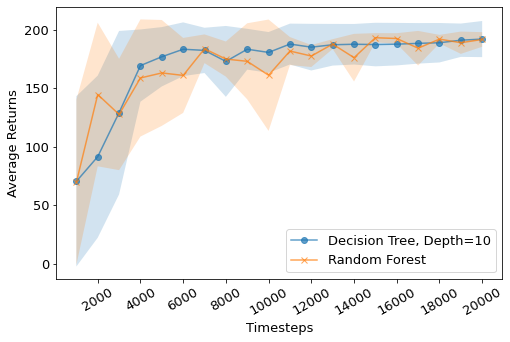

In [7]:
from utils.plot_utils import plot_returns
import numpy as np

legends = ["Decision Tree, Depth=10", "Random Forest"]
markers = ["o","x","^","+","v"]
means = []
stds = []
for i in range(len(legends)):
    a = np.genfromtxt(f'cartpole_{legends[i]}.csv', delimiter=',')
    means.append(a[0])
    stds.append(a[1])

plot_returns(save_name="cartpole_dt_depths", values=means, stds=stds, xlabel="Timesteps", ylabel="Average Returns", legend_names=legends, eval_freq=1000, markers=markers)

